In [1]:
# import main libraries
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt

### Section A (Easy)

In [2]:
# Consider the open data set available at: 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
# This data set is a subset of records taken till Mid-December'20
df = pd.read_csv('download.csv')
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [3]:
# 1. Convert the date to a suitable format, set it as index and sort the data w.r.t. it
df['dateRep'] = pd.to_datetime(df['dateRep'])
df = df.set_index(df['dateRep']).sort_index()
#df['countriesAndTerritories'].unique()

In [4]:
df['geoId'].unique()

array(['AM', 'PH', 'TH', 'MC', 'DE', 'OM', 'LK', 'AU', 'SM', 'AZ', 'EL',
       'HR', 'IN', 'IQ', 'KW', 'MX', 'TW', 'EC', 'FR', 'FI', 'KH', 'IT',
       'NG', 'BH', 'LU', 'RU', 'NO', 'BY', 'LT', 'CZ', 'VN', 'NZ', 'DK',
       'AF', 'IR', 'IE', 'QA', 'BR', 'UK', 'AT', 'RO', 'ID', 'LB', 'ES',
       'EE', 'JPG11668', 'SE', 'BE', 'US', 'KR', 'DO', 'MY', 'IL', 'NP',
       'DZ', 'CH', 'PK', 'EG', 'CA', 'JP', 'GE', 'NL', 'CN', 'SG', 'AE',
       'IS', 'MK', 'MT', 'SK', 'JE', 'UY', 'NI', 'GU', 'MA', 'GT', 'MD',
       'RW', 'BM', 'KN', 'CG', 'LC', 'PA', 'GG', 'CV', 'BW', 'BN', 'SX',
       'TR', 'AR', 'AI', 'PS', 'BF', 'ZM', 'GH', 'CI', 'SD', 'SL', 'ZA',
       'ER', 'TC', 'BG', 'AO', 'JM', 'IM', 'GM', 'KG', 'SA', 'SZ', 'SC',
       'MU', nan, 'RS', 'AD', 'MP', 'MG', 'BZ', 'SN', 'CM', 'GI', 'MM',
       'MZ', 'GL', 'SV', 'AG', 'GD', 'AL', 'VC', 'UG', 'NE', 'TD', 'BD',
       'PF', 'CY', 'TZ', 'LV', 'CW', 'TG', 'CU', 'MR', 'CL', 'BA', 'TL',
       'LA', 'GQ', 'GA', 'ET', 'BJ', 'CR', 'BB', 'PG

In [5]:
# 2. Convert country names to short format. Like USA.
# This have two options.
# Easy and evident option. Keep the column df['geoId'] which is the one who has the abbreviations per country.
# Hard option, get the abbreviations with code. As represented below.
unknown_country = {"Cases on an international conveyance Japan": 'JP',"Bonaire, Saint Eustatius and Saba":'BQ',
                   "Democratic Republic of the Congo":'CD',"United States Virgin Islands":'US-VI',
                   "United Republic of Tanzania":'TZ',"United States of America":'USA',"British Virgin Islands":'VG',
                   "Guinea Bissau":'GW',"Cote dIvoire":'CI',"Sint Maarten":'NL-SX',"Timor Leste":'TL',
                   "South Korea":'KR',"Cape Verde":'CV',"Palestine":'PS',"Venezuela":'VE',"Holy See":'VT',
                   "Moldova":'MD',"Vietnam":'VN',"Bolivia":'BO',"Taiwan":'TW',"Kosovo":'XK',"Russia":'RU',
                   "Syria":'SY',"Iran":'IR',"Laos":'LA'}
def country_short(country):
    clean_country = country.replace('_',' ')
    try:
        country_short = pycountry.countries.get(name=clean_country).alpha_2
    except:
        try:
            country_short = unknown_country[clean_country] 
        except:
            country_short = clean_country
    return country_short
def get_len_country(short):
    return len(short)
df['countriesAndTerritories'] = list(map(country_short, df['countriesAndTerritories']))

In [6]:
country_char = pd.DataFrame(df['countriesAndTerritories'], columns = ['countriesAndTerritories'])
country_char['country_short'] = list(map(get_len_country,df['countriesAndTerritories']))

In [7]:
country_char = country_char.sort_values(by=['country_short'], ascending=False).drop_duplicates()

In [8]:
df_countries = country_char.drop_duplicates()
df_countries

,countriesAndTerritories,country_short
dateRep,,
2020-05-31,NL-SX,5
2020-10-24,US-VI,5
2020-11-29,USA,3
2020-09-01,DK,2
2020-09-01,OM,2
...,...,...
2020-08-31,MW,2
2020-08-31,GH,2
2020-07-12,VU,2


In [9]:
# 3. Filter the data for countries in America, Asia and Europe
#America
df_america = df[df['continentExp'] == 'America']
#Asia
df_asia = df[df['continentExp'] == 'Asia']
#Europe
df_europe = df[df['continentExp'] == 'Europe']

In [10]:
# 4. Organize the data data such that, columns contain countries and roes correspond to dates.
#pivot table with respect to countries info 
# pvt per country 
df_pvt_country = df[['day','month','year','cases', 'deaths','countriesAndTerritories','popData2019','continentExp','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']].sort_values(by=['day','month','year'],ascending=True)
df_pvt_country = pd.pivot_table(df_pvt_country, values=['cases','deaths','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], index=['day','month','year'],columns=['countriesAndTerritories'], aggfunc=np.sum)
df_pvt_country

Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
countriesAndTerritories                                                         AD   
day month year                                                                       
1   1     2020                                                         NaN           
    2     2020                                                         NaN           
    3     2020                                                         NaN           
    4     2020                                                  475.209053           
    5     2020                                                   82.702128           
...                                                                    ...           
31  5     2020                                                    3.938197           
    7     2020                                                   59.072949           
    8     2020                                                  177.218846           
    10    2020                                                 1690.799060           
    12    2019                                                         NaN           

                                                                            \
countriesAndTerritories          AE         AF         AG   AI          AL   
day month year                                                               
1   1     2020             0.000000   0.000000        NaN  NaN         NaN   
    2     2020             0.040939   0.000000        NaN  NaN         NaN   
    3     2020             0.133053   0.002629        NaN  NaN         NaN   
    4     2020             5.639410   0.378531   0.000000  0.0    6.567853   
    5     2020            70.497740   3.619707   1.029707  0.0    8.908524   
...                             ...        ...        ...  ...         ...   
31  5     2020           115.336677  21.352852   0.000000  0.0    6.602788   
    7     2020            44.797998   3.869432  17.505020  0.0   47.023033   
    8     2020            55.043096   1.487839   1.029707  0.0   69.870777   
    10    2020           190.972318   3.553989  15.445606  0.0  144.387962   
    12    2019             0.000000   0.000000        NaN  NaN         NaN   

                                                                       ...  \
countriesAndTerritories          AM        AO          AR          AT  ...   
day month year                                                         ...   
1   1     2020             0.000000       NaN         NaN    0.000000  ...   
    2     2020             0.000000       NaN         NaN    0.000000  ...   
    3     2020             0.033810       NaN         NaN    0.112882  ...   
    4     2020            16.668199  0.000000    1.980765   99.900946  ...   
    5     2020            32.017819  0.025137    4.142412   11.017325  ...   
...                             ...       ...         ...         ...  ...   
31  5     2020           162.624826  0.113118   18.778189    5.621545  ...   
    7     2020           153.800485  1.479955  151.484988   19.652830  ...   
    8     2020            70.560917  2.340905  250.418289   43.403292  ...   
    10    2020           958.607418  9.970056  427.796142  440.105997  ...   
    12    2019             0.000000       NaN         NaN    0.000000  ...   

                        popData2019                                         \
countriesAndTerritories          VG          VN     VT  VU   WF         XK   
day month year                                                               
1   1     2020                  NaN  96462108.0    NaN NaN  NaN        NaN   
    2     2020                  NaN  96462108.0    NaN NaN  NaN        NaN   
    3     2020                  NaN  96462108.0    NaN NaN  NaN        NaN   
    4     2020              30033.0  96462108.0  815.0 NaN  NaN  1798506.0   
    5     2020              30033.0  96462108.0  815.0 NaN  NaN  1798506.0   
...      

In [11]:
# 5. Make sure the data data is clean and does not contain NaN's
df_pvt_country = df_pvt_country.fillna(0)
col_names = []
for col in df_pvt_country.columns:
    col_names.append(str(col[0])+str('_')+str(col[1]))

In [12]:
df_pvt_country.columns = col_names

In [13]:
df_pvt_country = df_pvt_country.reset_index()
df_pvt_country

,day,month,year,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AD,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AE,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AF,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AG,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AI,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AL,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AM,...,popData2019_VG,popData2019_VN,popData2019_VT,popData2019_VU,popData2019_WF,popData2019_XK,popData2019_YE,popData2019_ZA,popData2019_ZM,popData2019_ZW
0,1,1,2020,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,96462108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,2020,0.000000,0.040939,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,96462108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,2020,0.000000,0.133053,0.002629,0.000000,0.0,0.000000,0.033810,...,0.0,96462108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,2020,475.209053,5.639410,0.378531,0.000000,0.0,6.567853,16.668199,...,30033.0,96462108.0,815.0,0.0,0.0,1798506.0,0.0,58558267.0,17861034.0,14645473.0
4,1,5,2020,82.702128,70.497740,3.619707,1.029707,0.0,8.908524,32.017819,...,30033.0,96462108.0,815.0,0.0,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,31,5,2020,3.938197,115.336677,21.352852,0.000000,0.0,6.602788,162.624826,...,30033.0,96462108.0,815.0,0.0,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0
346,31,7,2020,59.072949,44.797998,3.869432,17.505020,0.0,47.023033,153.800485,...,30033.0,96462108.0,815.0,0.0,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0
347,31,8,2020,177.218846,55.043096,1.487839,1.029707,0.0,69.870777,70.560917,...,30033.0,96462108.0,815.0,0.0,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0
348,31,10,2020,1690.799060,190.972318,3.553989,15.445606,0.0,144.387962,958.607418,...,30033.0,96462108.0,815.0,0.0,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0


In [14]:
df_pvt_country['date'] = pd.to_datetime(df_pvt_country['day'].astype(str) + '/' + df_pvt_country['month'].astype(str) + '/' + df_pvt_country['year'].astype(str))
df_pvt_country = df_pvt_country.sort_values(by = 'date')
df_pvt_country = df_pvt_country.set_index(['date'])
df_pvt_country = df_pvt_country.drop(columns = ['day','month','year'])

In [15]:
df_pvt_country_rol = df_pvt_country.copy()
for col in col_names:
    df_pvt_country_rol[col] = df_pvt_country_rol[col].rolling(7).mean()
df_pvt_country_rol

,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AD,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AE,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AF,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AG,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AI,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AL,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AM,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AO,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AR,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AT,...,popData2019_VG,popData2019_VN,popData2019_VT,popData2019_VU,popData2019_WF,popData2019_XK,popData2019_YE,popData2019_ZA,popData2019_ZM,popData2019_ZW
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10,291.051480,78.742653,7.119245,6.178242,0.960578,36.767001,134.987782,1.510927,148.549091,44.469225,...,30033.0,96462108.0,815.0,0.000000,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0
2020-12-11,429.075893,98.374584,7.500405,5.148535,0.000000,64.341005,265.672068,2.826143,193.667405,164.258441,...,30033.0,96462108.0,815.0,42840.285714,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0
2020-12-12,544.033726,111.989876,7.361084,5.884040,5.763467,116.654254,323.858622,3.330235,219.199146,235.156667,...,30033.0,96462108.0,815.0,85680.571429,0.0,1798506.0,29161922.0,58558267.0,17861034.0,14645473.0


In [16]:
avg_per_country = []
for col in df_pvt_country_rol.columns:
    avg_per_country.append(df_pvt_country_rol[col].mean())

In [17]:
df_mean_rol_per_country = pd.DataFrame(avg_per_country).T
df_mean_rol_per_country.columns = df_pvt_country_rol.columns

In [18]:
df_mean_rol_per_country

,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AD,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AE,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AF,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AG,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AI,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AL,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AM,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AO,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AR,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000_AT,...,popData2019_VG,popData2019_VN,popData2019_VT,popData2019_VU,popData2019_WF,popData2019_XK,popData2019_YE,popData2019_ZA,popData2019_ZM,popData2019_ZW
0,364.877401,72.224512,5.031203,5.862232,1.390604,58.823288,192.237029,1.963155,131.066518,134.02864,...,22661.943937,9.534046e+07,643.403239,27397.857143,0.0,1.425062e+06,2.084205e+07,4.742052e+07,1.389274e+07,1.130645e+07


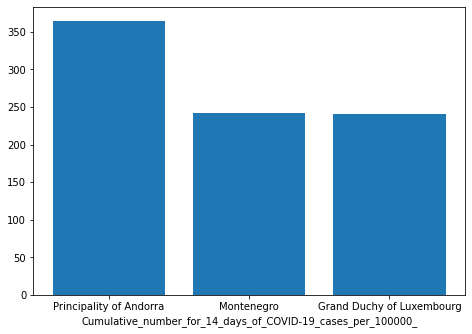

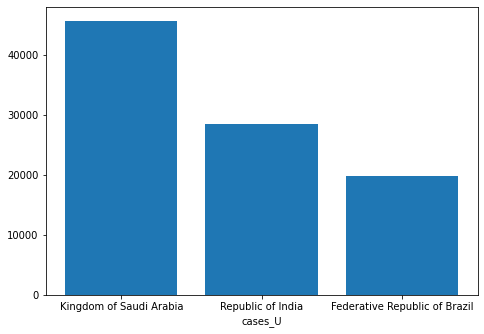

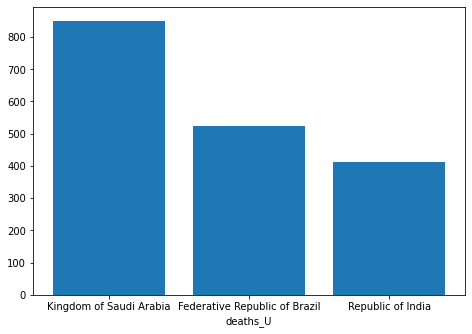

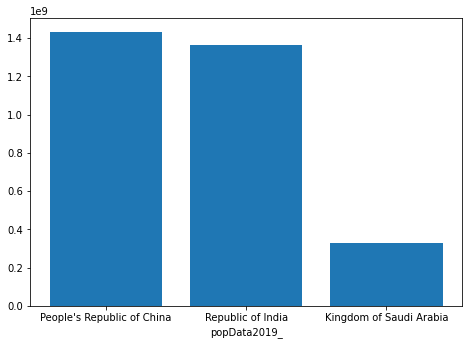

In [19]:
# 6. Based on the cleansed data set answer the following questions:
# a. Plot the 7-day rolling average for top three countries. This does not specify for which attribute. 
# I decided to plot top 3 in 'cases','deaths','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
batch_size = 213
df_mean_rol_per_country
def get_country_code(txt):
    return txt[-2:]
for i in range(1,5):
    df_slice = df_mean_rol_per_country.iloc[:,batch_size*(i-1):(batch_size*i)]
    df_slice = df_slice.T.sort_values(by=[0], ascending=False)
    df_slice = df_slice.iloc[:3,:]
    name_plot = df_slice.index[0][:-2]
    df_slice['country_code'] = list(map(get_country_code,df_slice.index))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    countries = [pycountry.countries.get(alpha_2=code).official_name for code in df_slice['country_code'] ]
    amount = df_slice[0]
    ax.bar(countries,amount)
    plt.xlabel(name_plot)
    plt.show()
# b. When was the first case recorded in each country?


In [20]:
df_cases = df_pvt_country.iloc[:,213:426].sort_index(ascending=True)

In [21]:
df_cases = df_pvt_country.iloc[:,213:426].sort_index(ascending=True)
df_cases

def get_first_case(cases, col):
    case = cases
    case_prev = case.shift(1).fillna(0)
    case_diff = case-case_prev
    case_diff = case_diff.reset_index()
    date = []
    for i in range(len(case_diff[col])):
        if case_diff[col][i] != 0:
            date = case_diff['date'][i]
            break
    try:
        country_name = pycountry.countries.get(alpha_2=col[-2:]).official_name
    except:
        country_name = pycountry.countries.get(alpha_2=col[-2:]).name
    return country_name, date

for col in df_cases.columns:
    try:
        print(get_first_case(df_cases[col], col))
    except:
        print(col)

('Principality of Andorra', Timestamp('2020-01-04 00:00:00'))
('United Arab Emirates', Timestamp('2020-01-04 00:00:00'))
('Islamic Republic of Afghanistan', Timestamp('2020-01-04 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-01-11 00:00:00'))
('Anguilla', Timestamp('2020-01-12 00:00:00'))
('Republic of Albania', Timestamp('2020-01-04 00:00:00'))
('Republic of Armenia', Timestamp('2020-01-03 00:00:00'))
('Republic of Angola', Timestamp('2020-01-06 00:00:00'))
('Argentine Republic', Timestamp('2020-01-05 00:00:00'))
('Republic of Austria', Timestamp('2020-01-03 00:00:00'))
('Australia', Timestamp('2020-01-02 00:00:00'))
('Aruba', Timestamp('2020-01-04 00:00:00'))
('Republic of Azerbaijan', Timestamp('2020-01-04 00:00:00'))
('Republic of Bosnia and Herzegovina', Timestamp('2020-01-04 00:00:00'))
('Barbados', Timestamp('2020-01-05 00:00:00'))
("People's Republic of Bangladesh", Timestamp('2020-01-04 00:00:00'))
('Kingdom of Belgium', Timestamp('2020-01-03 00:00:00'))
('Burkina Faso',

('Ukraine', Timestamp('2020-01-04 00:00:00'))
('Republic of Uganda', Timestamp('2020-01-04 00:00:00'))
('Virgin Islands of the United States', Timestamp('2020-01-08 00:00:00'))
('Kingdom of Saudi Arabia', Timestamp('2020-01-02 00:00:00'))
('Eastern Republic of Uruguay', Timestamp('2020-01-04 00:00:00'))
('Republic of Uzbekistan', Timestamp('2020-01-04 00:00:00'))
('Saint Vincent and the Grenadines', Timestamp('2020-01-08 00:00:00'))
('Bolivarian Republic of Venezuela', Timestamp('2020-01-05 00:00:00'))
('British Virgin Islands', Timestamp('2020-01-09 00:00:00'))
('Socialist Republic of Viet Nam', Timestamp('2020-01-04 00:00:00'))
cases_VT
('Republic of Vanuatu', Timestamp('2020-11-11 00:00:00'))
('Wallis and Futuna', Timestamp('2020-10-17 00:00:00'))
cases_XK
('Republic of Yemen', Timestamp('2020-01-06 00:00:00'))
('Republic of South Africa', Timestamp('2020-01-04 00:00:00'))
('Republic of Zambia', Timestamp('2020-01-05 00:00:00'))
('Republic of Zimbabwe', Timestamp('2020-01-04 00:00:0

In [22]:
# Manually check VT and XK they are not available on pycountry library
# XK register the first case on the 2020-01-04 and VT register the first case on the 2020-01-05
pycountry.countries.get(alpha_2='VT')
pycountry.countries.get(alpha_2='XK')
df_cases[['cases_VT','cases_XK']]

,cases_VT,cases_XK
date,,
2019-12-31,0.0,0.0
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,7.0
...,...,...
2020-12-10,0.0,49.0
2020-12-11,0.0,733.0
2020-12-12,0.0,590.0


### Section B (Medium) Solution made with Spark

In [23]:
#Consider the open data set available at:

#2014: 'https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2014/jt7v-77mi'
#2015: 'https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2015/c284-tqph'
#2016: 'https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2016/kiv2-tbus'
#2017: 'https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2017/2bnn-yakx'
#2018: 'https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2018/a5td-mswe'
#2019: 'https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2019/faiq-9dfq'
#2020: 'https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2020/p7t3-5i9s/'

#importing necessary libaries
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import StringType
from pyspark import SQLContext
from itertools import islice
from pyspark.sql.functions import col
from functools import reduce
from pyspark.sql import DataFrame

#creating the context
sqlContext = SQLContext(sc)

#Turn into df data

def get_df_data(rdd_path):
    rdd = sc.textFile(rdd_path).map(lambda line:line.split(","))
    rdd = rdd.mapPartitionsWithIndex(lambda idx, it: islice(it, 1, None) if idx == 0 else it)
    df = rdd.toDF(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type', 'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make', 'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3', 'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct', 'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad', 'Violation Time', 'Time First Observed', 'Violation County', 'Violation In Front Of Or Opposite', 'Number', 'Street', 'Intersecting Street', 'Date First Observed', 'Law Section', 'Sub Division', 'Violation Legal Code', 'Days Parking In Effect', 'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color', 'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number', 'Feet From Curb', 'Violation Post Code', 'Violation Description', 'No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation'])
    return df
def get_df_data_(rdd_path):
    rdd = sc.textFile(rdd_path).map(lambda line:line.split(";"))
    rdd = rdd.mapPartitionsWithIndex(lambda idx, it: islice(it, 1, None) if idx == 0 else it)
    df = rdd.toDF(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type', 'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make', 'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3', 'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct', 'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad', 'Violation Time', 'Time First Observed', 'Violation County', 'Violation In Front Of Or Opposite', 'Number', 'Street', 'Intersecting Street', 'Date First Observed', 'Law Section', 'Sub Division', 'Violation Legal Code', 'Days Parking In Effect', 'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color', 'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number', 'Feet From Curb', 'Violation Post Code', 'Violation Description', 'No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation'])
    return df 

# load data from s3
df_2014 = get_df_data('s3://aws-logs-915129545810-us-west-1/Parking_Violations_Issued_-_Fiscal_Year_2014.csv')[['Summons Number','Plate ID','Registration State','Plate Type','Issue Date','Violation Code','Violation Description']]
df_2015 = get_df_data('s3://aws-logs-915129545810-us-west-1/Parking_Violations_Issued_-_Fiscal_Year_2015.csv')[['Summons Number','Plate ID','Registration State','Plate Type','Issue Date','Violation Code','Violation Description']]
df_2016 = get_df_data('s3://aws-logs-915129545810-us-west-1/Parking_Violations_Issued_-_Fiscal_Year_2016.csv')[['Summons Number','Plate ID','Registration State','Plate Type','Issue Date','Violation Code','Violation Description']]
df_2017 = get_df_data('s3://aws-logs-915129545810-us-west-1/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')[['Summons Number','Plate ID','Registration State','Plate Type','Issue Date','Violation Code','Violation Description']]
df_2018 = get_df_data('s3://aws-logs-915129545810-us-west-1/Parking_Violations_Issued_-_Fiscal_Year_2018.csv')[['Summons Number','Plate ID','Registration State','Plate Type','Issue Date','Violation Code','Violation Description']]
df_2019 = get_df_data_('s3://aws-logs-915129545810-us-west-1/Parking_Violations_Issued_-_Fiscal_Year_2019.csv')[['Summons Number','Plate ID','Registration State','Plate Type','Issue Date','Violation Code','Violation Description']]
df_2020 = get_df_data('s3://aws-logs-915129545810-us-west-1/Parking_Violations_Issued_-_Fiscal_Year_2020.csv')[['Summons Number','Plate ID','Registration State','Plate Type','Issue Date','Violation Code','Violation Description']]
dfs = [df_2020,df_2019,df_2018,df_2017,df_2016]

# get date components

def compute_date(df):
    df2 = df.withColumn("Issue Date", to_date(df["Issue Date"], "MM/dd/yyyy"))
    df3 = df2.withColumn("Month", month("Issue Date")) 
    df4 = df3.withColumn("Year", year("Issue Date"))
    df4 = df4.withColumnRenamed("Summons Number","Summons_Number").withColumnRenamed("Plate ID","Plate_ID").withColumnRenamed("Registration State","Registration_State").withColumnRenamed("Plate Type","Plate_Type").withColumnRenamed("Issue Date","Issue_Date").withColumnRenamed("Violation Code","Violation_Code").withColumnRenamed("Violation Description","Violation_Description")
    return df4

dfs_ = []
for df in dfs:
    dfs_.append(compute_date(df))
    
# stack data into one big df

df_complete = reduce(DataFrame.unionAll, dfs_)

# clean data

df_5_years_ago = df_complete.filter(df_complete.Year >= 2015)
# some data cleaning
df_5_years_ago.na.fill(value="9999999999",subset=["Summons_Number"])
df_5_years_ago.na.fill(value="na",subset=["Plate_ID"])
df_5_years_ago.na.fill(value="na",subset=["Registration_State"])
df_5_years_ago.na.fill(value="na",subset=["Plate_Type"])
df_5_years_ago.na.fill(value="01/01/2020",subset=["Issue_Date"])
df_5_years_ago.na.fill(value="na",subset=["Violation_Code"])
df_5_years_ago.na.fill(value="na",subset=["Violation_Description"])

# create temporary view from 5 year old data stacked

df_5_years_ago.createOrReplaceTempView("vw_5_ago")
df_5_years_ago.take(5)



In [ ]:
# 1. How many summons were issued in each of the states over the last 5 years?
# add term to sum 
df_ = spark.sql("""
    SELECT *, 
        1 as count_state 
    FROM vw_5_ago 
""")
df_.createOrReplaceTempView("vw_5_ago_t")
# group by to get the states
df_1 = spark.sql("""
    select 
        Registration_State,
        SUM(count_state) as summons_per_state
    FROM vw_5_ago_t
    GROUP BY Registration_State
""")

In [ ]:
# 2. Which states had the highest ticktes?
df_2 = df_1.orderBy(col("summons_per_state").asc())

In [ ]:
# 3. Which months observed highest number of tickets?
df_3 = spark.sql(
    """
    select 
        Month,
        SUM(count_state) as count_months
    FROM vw_5_ago_t
    GROUP BY Month
    """
)

In [ ]:
# 4. Convert the data in csv format with columns "Month", "Registration State", followed by columns for each "Plate Type".
#    Populate this table with values corresponding to number of tickets.
# first count tickets per Plate Type
df4_ = spark.sql("""
    SELECT 
        Month,
        Registration_State,
        Plate_Type,
        SUM(count_state)
    FROM vw_5_ago_t
    GROUP BY Month, Registration_State, Plate_Type
""")
# then create the pivot
d4.groupby(df4.Month, df4.Registration_State,df4.Plate_Type)
    .pivot("Plate_Type")
    .agg(sum("count_state"))

In [ ]:
# 5. What are the most summoned violation codes across months and states?
df5 = spark.sql("""
    select 
        Month,
        Registration_State,
        Violation_Code,
        Violation_Description,
        SUM(count_state) as amount_violation_code_per_month_per_state
    FROM vw_5_ago_t
    GROUP BY Month, Registration_State, Violation_Code, Violation_Description
    order by amount_violation_code_per_month_per_state desc
""")